# House Price Analytics

## 01 Data Extraction and Cleaning

**Project:** Code Institute – Capstone Project

---
### **Objectives**
- Load the house dataset from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction 
- Inspect structure, datatypes, and completeness.
- Verify working directory and environment setup.
- Handle missing values and remove duplicates.
- Handling outliers and anormalies 
- Statistical analysis
- Prepare the dataset for feature engineering and visualisation.

### **Inputs**
- `data/raw/kc_house_data.csv`

### **Outputs**
- `data/processed/cleaned_house_data.csv`
        
### **Additional Comments**
Confirm the kc_house_data.csv is exisit under data directory. Run this notebook top-down.

---

### Setup the file and Load the Dataset

Ignore warning

In [1]:
import warnings 
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

Import nesessary libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Set the home directory. Need to change the working directory from its current folder to its parent folder. Access the current directory with os.getcwd()

In [ ]:
PROJECT_DIR = os.path.join(os.getcwd()) # Define the project root directory
os.chdir(PROJECT_DIR) # Change the current working directory
print("Working directory:", os.getcwd()) 

Working directory: c:\MyStuff\CodeInstitute\Projects\ci-project-02\Home-Value-Analysis\notebooks


Load the data from the original data set reside within data directory under data/raw/ directory. 

In [4]:
# LOAD DATASET
try:
    # Data directory paths
    data_path = os.path.join("..","data", "raw")
    # Extract the original dataset
    df_original = pd.read_csv(os.path.join(data_path, "kc_house_data.csv"))
    print("Dataset loaded successfully.")
except Exception as e:
    print(e)
    print("Error loading the dataset.")
    df_original = pd.DataFrame()  # Create an empty DataFrame if loading fails

print(f"Original dataset shape: {df_original.shape}")

Dataset loaded successfully.
Original dataset shape: (21613, 21)


### Understanding the Data - Initial Data Exploration

Check the first 5 rows of the data set

In [5]:
# Quick Look 
print("=== Quick look at five rows ===")
with pd.option_context('display.max_columns', None):
    print(df_original.head())

=== Quick look at five rows ===
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0

Check the column names

In [6]:
# What are the column name
print("=== What are the column name ===")
print(df_original.columns)

=== What are the column name ===
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Data types

In [7]:
# Data Types and Non-Null Counts 
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Check for Duplicates

In [8]:
# Check for Duplicates
duplicates = df_original.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    df_original = df_original.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")


Duplicate Rows: 0
No duplicates found.


Check for Missing Values
- If there were NaNs, we would impute them.
- For skewed data, use Median. For categorical data, use Mode.

In [9]:
# Check for Missing Values
missing = df_original.isnull().sum()
if missing.sum() == 0:
    print("\nNo missing values found.")
else:
    print(f"\nMissing Values:\n{missing[missing > 0]}")


No missing values found.


**Observations from Initial Data Exploration**

- Target Variable: price has been identified as the key dependent variable for our analysis and prediction models.
- Numerical Property Characteristics: The dataset includes several continuous and discrete numerical features describing the property structure, specifically bathrooms, sqft_living, sqft_lot, floors, and yr_built.
- Categorical Features (Numerically Encoded): Variables such as waterfront, view, condition, and grade are stored as numbers but function as categorical or ordinal data (representing classifications or ratings rather than continuous measurements).
- Location Identifiers: Unlike datasets with full addresses, this dataset does not contain street, city, or statezip columns. Instead, analysis will rely on zipcode, lat (latitude), and long (longitude).
- No Missing values or Duplicates were found in the data set.

---

## Descriptive Statistics
High level analysis with descritpive statistics

In [10]:
print("\n--- DESCRIPTIVE STATS ---")
numerical_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
ser_skew = df_original[numerical_cols].skew()
ser_skew.name = 'Skewness'

ser_kurt = df_original[numerical_cols].kurtosis()
ser_kurt.name = 'Kurtosis'

SummaryStats = df_original.describe(include='all')

# Append Skewness and Kurtosis to Summary Statistics
SummaryStats = pd.concat([SummaryStats, ser_skew.to_frame().T, ser_kurt.to_frame().T])
display(SummaryStats)



--- DESCRIPTIVE STATS ---


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


**Observations from Descriptive Statistics**
- Price distribution is highly right-skewed. The mean price (~$540k) is dwarfed by the maximum value of $7.7M. This confirms the presence of "luxury market" outliers which may require logarithmic transformation (np.log1p) to normalize the data for predictions.
- The spatial features exhibit extreme right-skewness, where the maximum values are several standard deviations away from the median. For example, sqft_living extends to 13,540 sq ft against a median of 1,910 sq ft. It's advisable to use non-parametric tests (like Mann-Whitney U) which tolarate such extremes.
- The bedrooms column contains a significant outlier with a maximum value of 33. This is likely a data entry error (possibly meant to be 3) and should be removed to prevent it impacting the analysis.
- Both bedrooms and bathrooms feature minimum values of 0. We must investigate these specific records to determine if they are missing data points that require imputation.

---


## Outlier Detection

- Check every numerical variable with a Histogram & Boxplot.

--- Visualizing Raw Data Distributions ---


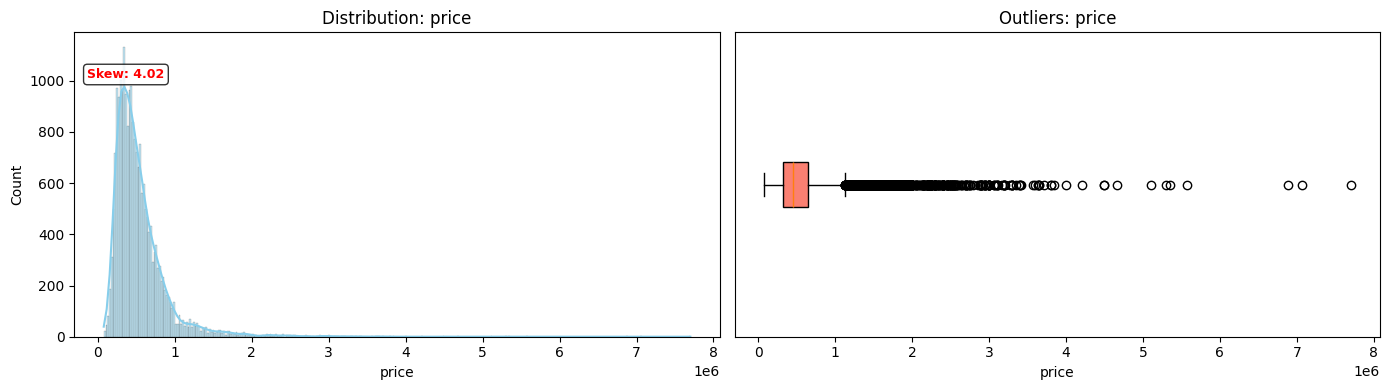

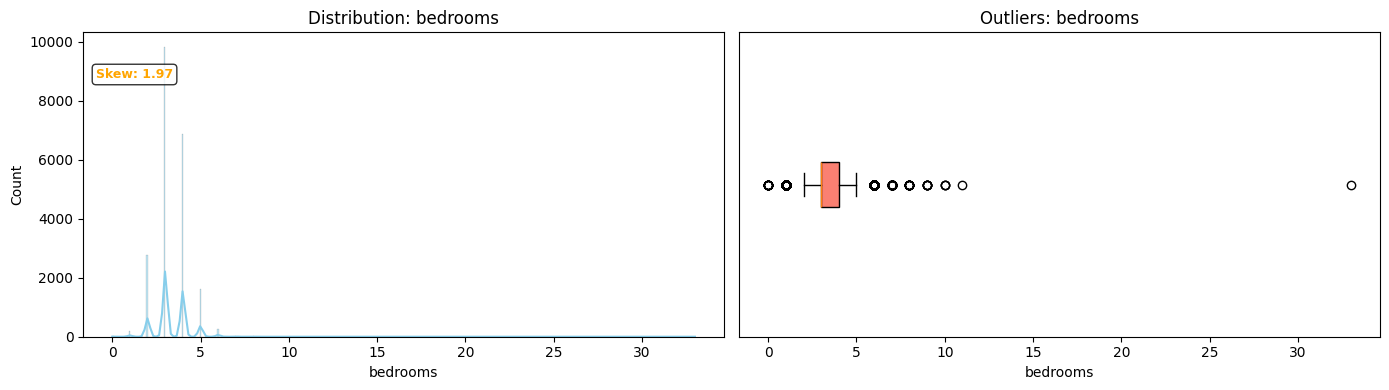

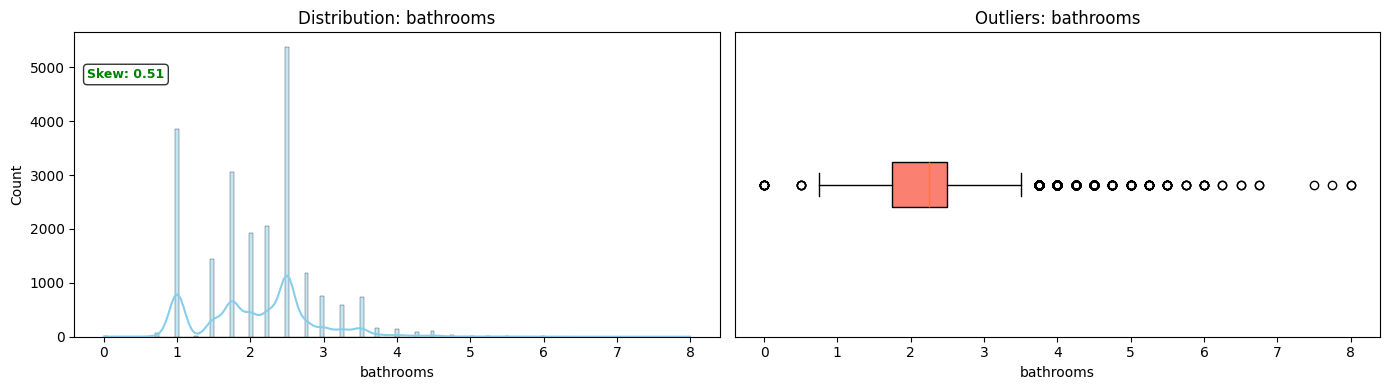

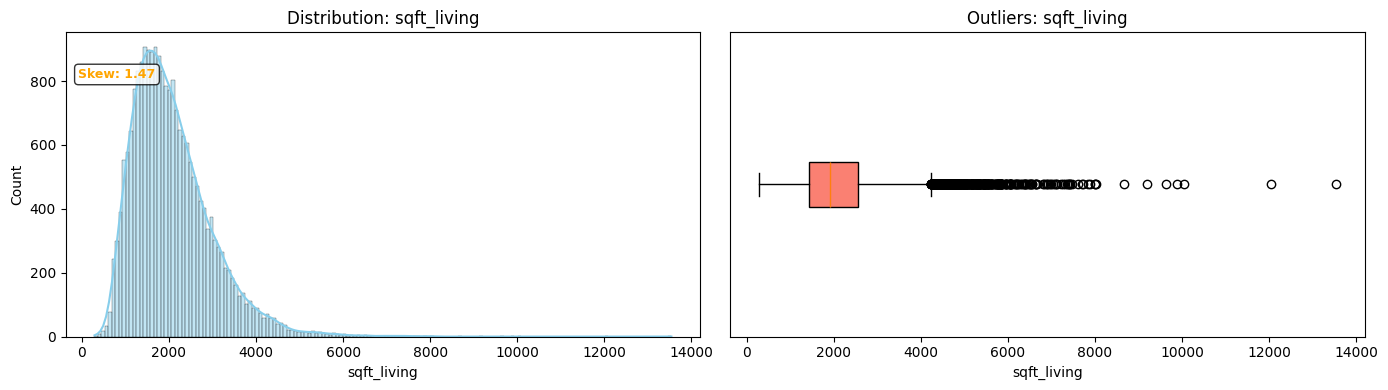

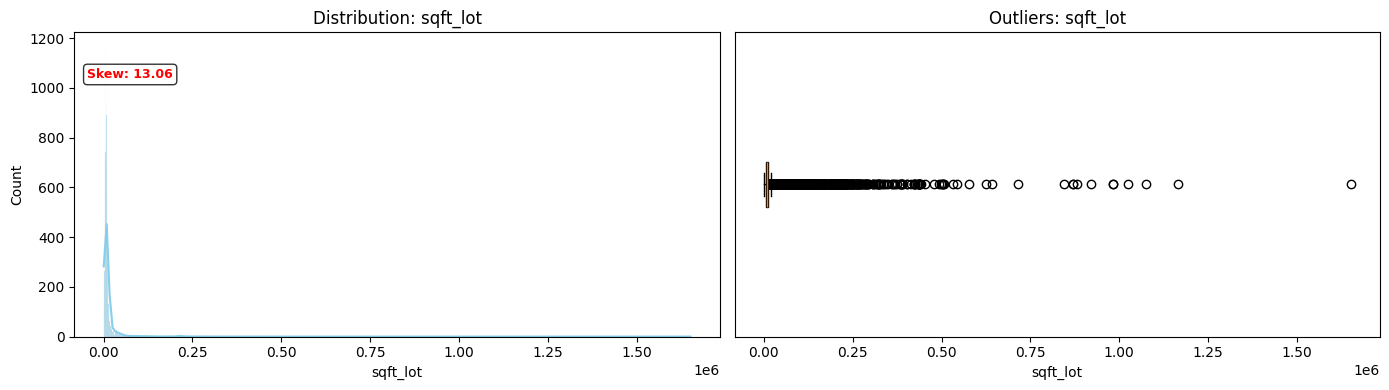

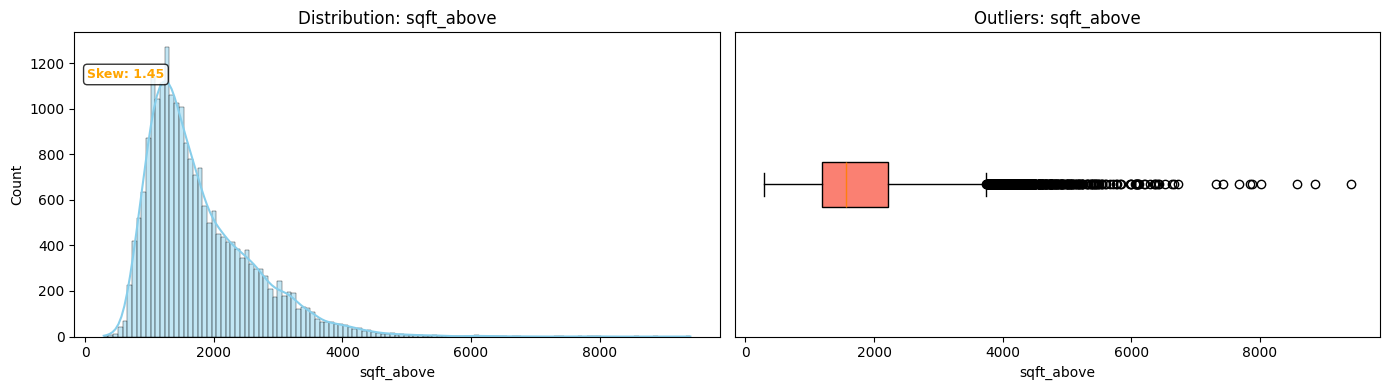

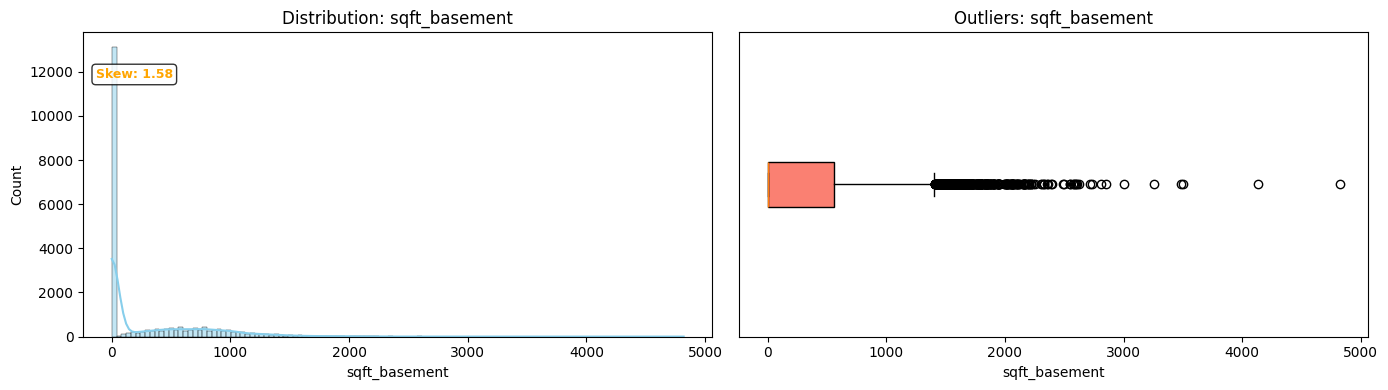

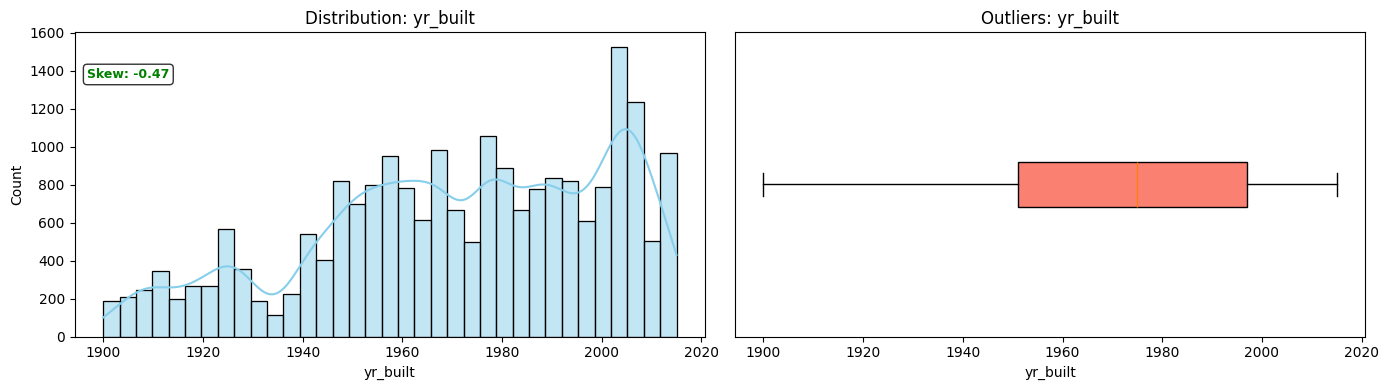

In [14]:
# List of numerical variables to inspect for outliers
# These columns are chosen based on domain knowledge and initial data exploration
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'sqft_above', 'sqft_basement', 'yr_built']

def plot_outliers(data, columns):
    """
    Generates Boxplots and Histograms.
    Uses Matplotlib for boxplots to have more control over.
    """
    for col in columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        
        # Histogram (Seaborn works fine here)
        sns.histplot(data=data, x=col, kde=True, ax=axes[0], color='skyblue')
        axes[0].set_title(f'Distribution: {col}')
        # Add skewness information
        skewness = data[col].skew()
        skew_color = 'green' if abs(skewness) < 1 else 'orange' if abs(skewness) < 2 else 'red'
        axes[0].text(0.02, 0.85, f'Skew: {skewness:.2f}', transform=axes[0].transAxes,
            fontsize=9, color=skew_color, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Boxplot (Matplotlib for simple 1D boxplot)
        # As a best practice, drop NaNs and convert to numpy to be 100% safe
        clean_values = data[col].dropna().values
        
        axes[1].boxplot(clean_values, vert=False, patch_artist=True, 
                        boxprops=dict(facecolor='salmon'))
        axes[1].set_title(f'Outliers: {col}')
        axes[1].set_yticks([]) # Hide y-axis ticks as they are meaningless for 1D boxplot
        axes[1].set_xlabel(col)
        
        plt.tight_layout()
        plt.show()

# Run visualization
print("--- Visualizing Raw Data Distributions ---")
plot_outliers(df_original, numerical_cols)

**Further analysis to confirm the bedroom/ bathroom related extreme values**

In [15]:
def detect_extreme_br_values(df):
    # list the bedrooms details for rooms > 10.
    print("\n--- Listings with more than 10 bedrooms ---")
    print(df[df['bedrooms'] > 10][['id', 'bedrooms', 'price', 'bathrooms']])

    print("\n--- ================================ ---")

    # list the bedrooms details for rooms = 0 or Bathroom =0. 
    print("\n--- Listings with 0 bedrooms or 0 bathrooms ---")
    zero_bed_bath = df[(df['bedrooms'] == 0) | (df['bathrooms'] == 0)][['id', 'bedrooms', 'price', 'bathrooms']]
    if zero_bed_bath.empty:
        print("No listings with 0 bedrooms or 0 bathrooms found.")
    else:
        print(zero_bed_bath)

    # list the price and sqrft details for luxury properties > $4,000,000
    print("\n--- Listings with price greater than $4,000,000 ---")
    luxury_properties = df[df['price'] > 4000000][['id', 'price', 'sqft_living', 'sqft_lot']]
    if luxury_properties.empty:
        print("No luxury properties found.")
    else:
        print(luxury_properties)
        
detect_extreme_br_values(df_original)


--- Listings with more than 10 bedrooms ---
               id  bedrooms     price  bathrooms
8757   1773100755        11  520000.0       3.00
15870  2402100895        33  640000.0       1.75

--- ================================ ---

--- Listings with 0 bedrooms or 0 bathrooms ---
               id  bedrooms      price  bathrooms
875    6306400140         0  1095000.0       0.00
1149   3421079032         1    75000.0       0.00
3119   3918400017         0   380000.0       0.00
3467   1453602309         0   288000.0       1.50
4868   6896300380         0   228000.0       1.00
5832   5702500050         1   280000.0       0.00
6994   2954400190         0  1295650.0       0.00
8477   2569500210         0   339950.0       2.50
8484   2310060040         0   240000.0       2.50
9773   3374500520         0   355000.0       0.00
9854   7849202190         0   235000.0       0.00
10481   203100435         1   484000.0       0.00
12653  7849202299         0   320000.0       2.50
14423  9543000205

**Observations**

1. There are 16 properties that have either 0 bedrooms or 0 bathrooms.
  - Some have 0 for both (e.g., ID 9543000205, Price 140k). These are likely plots of land or commercial structures erroneously included, or data entry errors (a 4,810 sqft house with 0 beds/baths is highly unlikely).
  - Some have 0 bedrooms but 2.5 bathrooms (e.g., ID 2310060040), or 1 bedroom and 0 bathrooms. These are technically possible (studios or specific structures) but statistically problematic for a "House Price" model that relies on bedroom count as a key feature.
  - Price Impact: They range from $75k to $1.29M. Their inclusion skews the price per bedroom metric to infinity.

2. Analysis of the 33-Bedroom House
  - Stats: 33 Bedrooms, 1.75 Bathrooms, 1,620 sqft living space.
  - Verdict: This is clearly a data entry error. It is physically impossible to fit 33 bedrooms into 1,620 sqft (that’s ~49 sqft per room, not accounting for walls/hallways). It was likely meant to be 3 bedrooms.
  - Impact: This single data point will severely distort any linear model or clustering algorithm that uses "Bedrooms" as a feature.

3. General Outlier Analysis (Visuals)
  - Price: Heavily right-skewed with a long tail of luxury properties ($4M+).
  - Sqft_Living: Similar right skew again with a long tail of luxury properties. 
  - Sqft_Lot: Extreme outliers exist (huge plots of land).

**Outlier Handling**
1. Drop the 33-Bedroom House: It is an error.
2. Drop Zero Bed/Bath Properties:
  -  For a residential house price analysis, a home without a bedroom or bathroom is not a comparable unit.
3. Handle Price/Size Outliers (No immediate actions to be taken)
  -  For the Buyer/Seller Analysis, keeping high-priced homes is recomended as they are real.
  -  For the Prediction Model, need to consider dropping them (e.g., removing homes > $4M or > 10,000 sqft) for the model to generalize better for the "average" buyer. Or it's possible to use Log Price to minimize the effect, but need to reconmfirm the behaviour of the log value checking the normality of the distribution.

In [16]:
print("--- Handling Identified Anomalies ---")

# The 33-Bedroom House
# Identifying the record
outlier_bedroom = df_original[df_original['bedrooms'] > 30]
if not outlier_bedroom.empty:
    print(f"\nDetected extreme bedroom outlier (likely error):\n{outlier_bedroom[['id', 'bedrooms', 'sqft_living']]}")
    # Removing it
    df_clean = df_original[df_original['bedrooms'] != 33].copy()
    print("-> Removed 33-bedroom house.")
else:
    df_clean = df_original.copy()
    print("No >30 bedroom outlier found.")

# Zero Bedroom/Bathroom Properties
# Identifying records with 0 beds OR 0 baths
zero_bed_bath = df_clean[(df_clean['bedrooms'] == 0) | (df_clean['bathrooms'] == 0)]
print(f"\nDetected {len(zero_bed_bath)} properties with 0 bedrooms or 0 bathrooms.")
# Removing them (as they are likely commercial lots or errors)
if len(zero_bed_bath) > 0:
    df_clean = df_clean[(df_clean['bedrooms'] > 0) & (df_clean['bathrooms'] > 0)]
    print("-> Removed properties with 0 beds/baths.")

print(f"\nNew Data Shape: {df_clean.shape}")

--- Handling Identified Anomalies ---

Detected extreme bedroom outlier (likely error):
               id  bedrooms  sqft_living
15870  2402100895        33         1620
-> Removed 33-bedroom house.

Detected 16 properties with 0 bedrooms or 0 bathrooms.
-> Removed properties with 0 beds/baths.

New Data Shape: (21596, 21)


Confirmim the outlier and anormaly removal


--- Listings with more than 10 bedrooms ---
              id  bedrooms     price  bathrooms
8757  1773100755        11  520000.0        3.0

--- ================================ ---

--- Listings with 0 bedrooms or 0 bathrooms ---
No listings with 0 bedrooms or 0 bathrooms found.
--- -------------------------------- ---

Cleaned Data Shape: (21596, 21)
--- Visualizing Cleaned Data Distributions ---


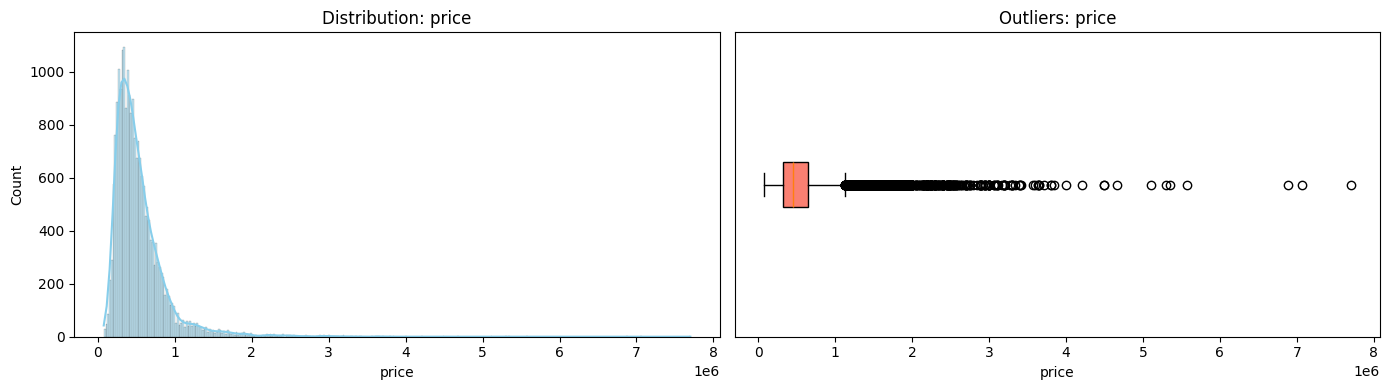

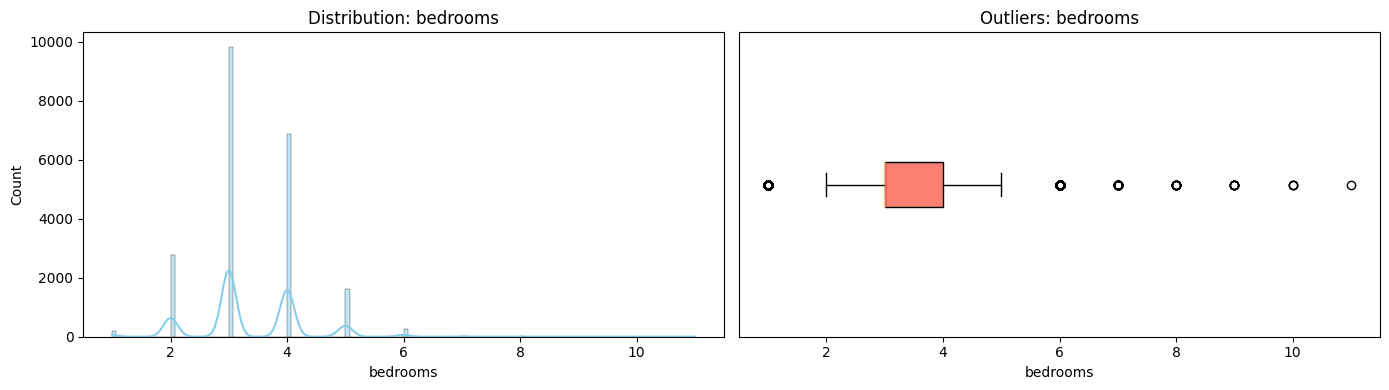

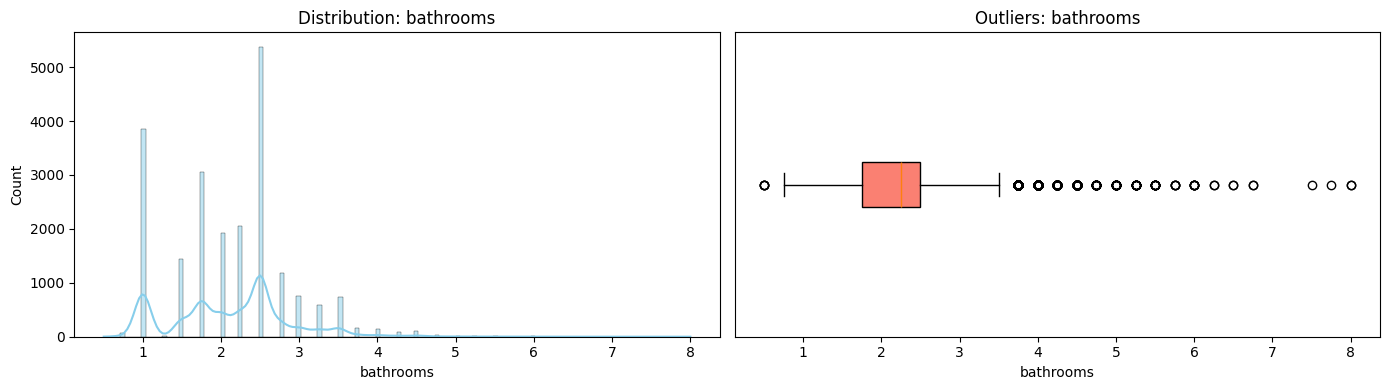

In [ ]:
#Confirm removal
detect_extreme_br_values(df_clean)
print("--- -------------------------------- ---")
print(f"\nCleaned Data Shape: {df_clean.shape}")
print("--- Visualizing Cleaned Data Distributions ---")
plot_outliers(df_clean, ['bedrooms', 'bathrooms'])

---

## Correlation Analysis

**To identify the features that are highly correlated with the price**

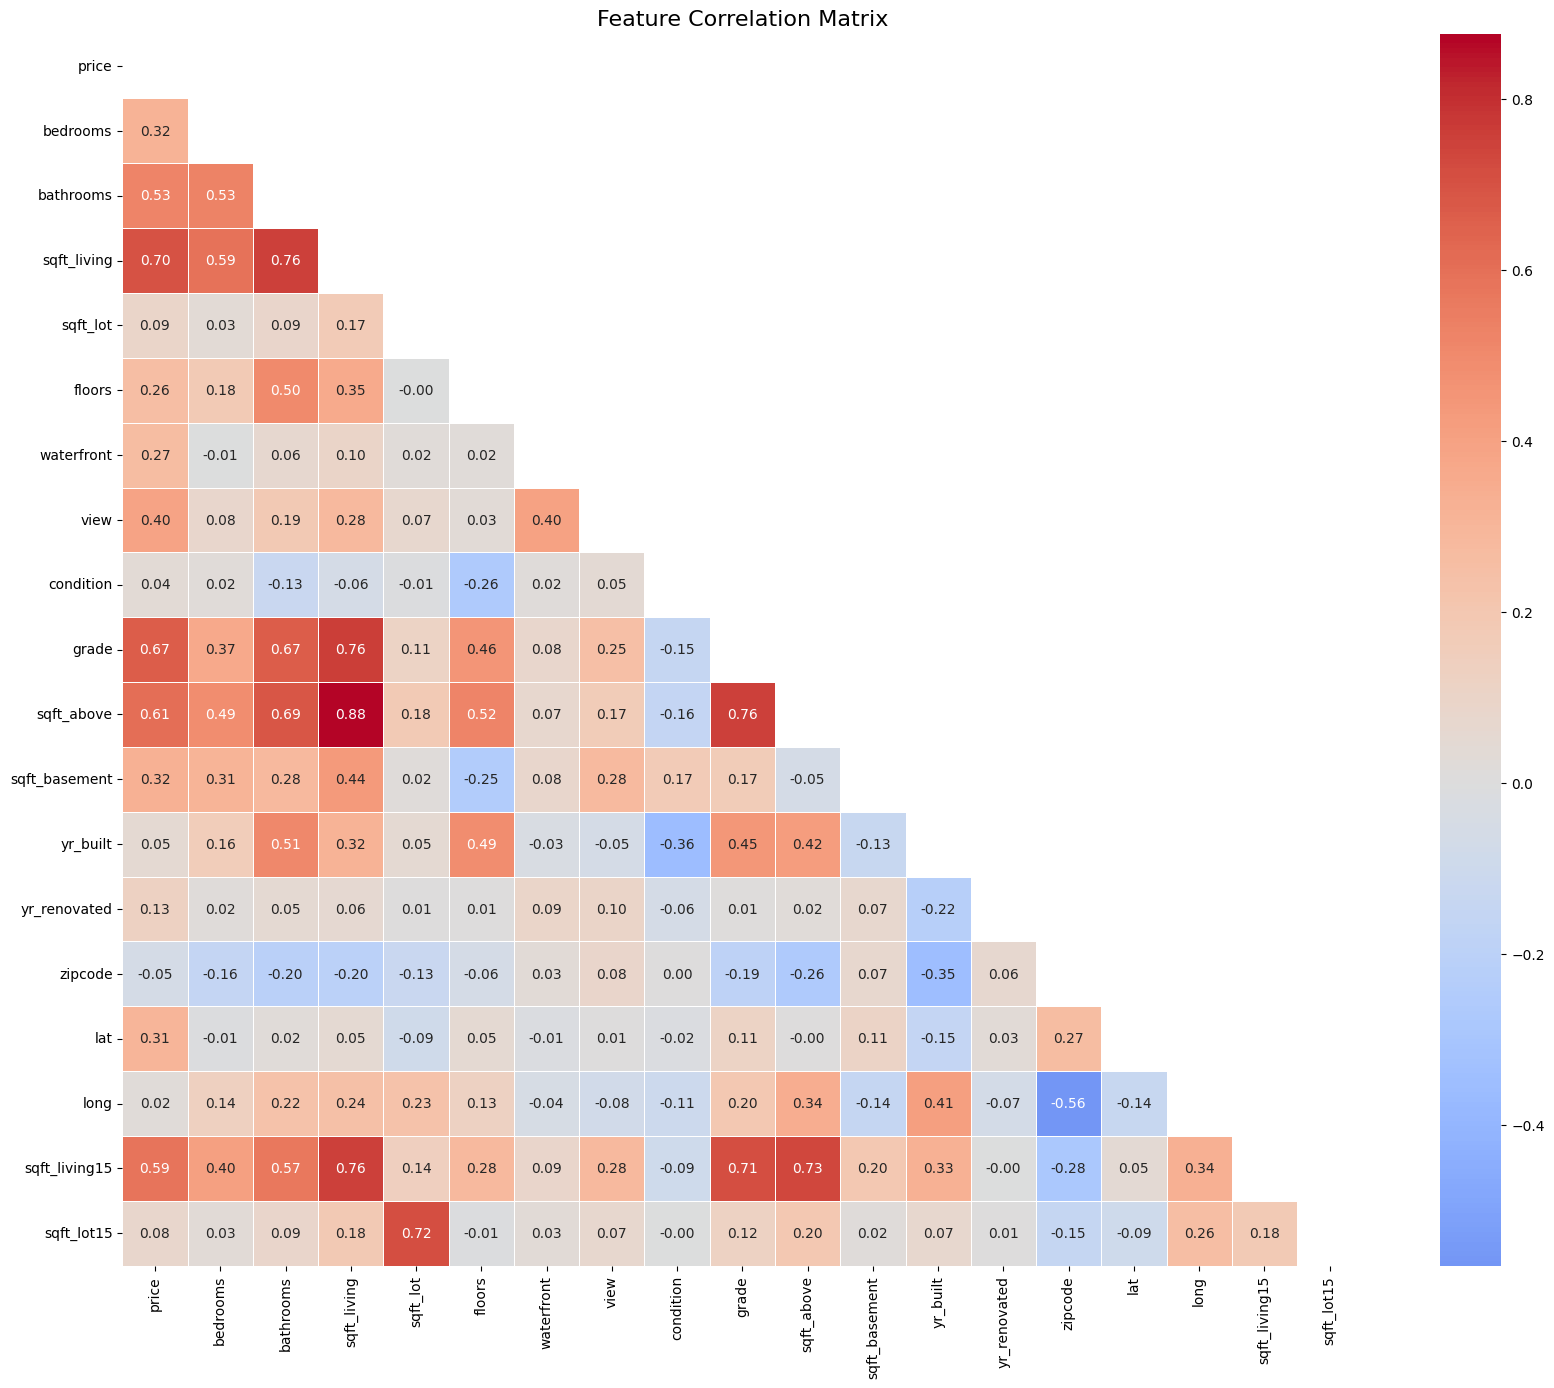

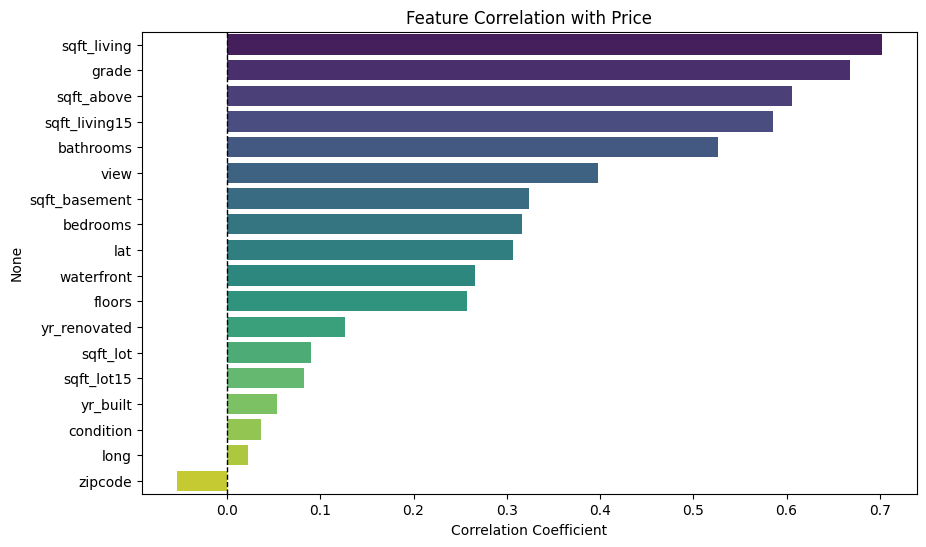

In [17]:
# Select numerical columns
corr_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Remove 'id' if present
if 'id' in corr_df.columns:
    corr_df = corr_df.drop(columns=['id'])

# Compute Correlation
corr_matrix = corr_df.corr()

# Plot Heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Create a mask to hide the upper triangle (redundant)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, mask=mask, center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

# Bar Chart for Price Correlation (Easier for non-technical stakeholders to read)
plt.figure(figsize=(10, 6))
# Drop 'price' itself and sort
price_corr = corr_matrix['price'].drop('price').sort_values(ascending=False)
sns.barplot(x=price_corr.values, y=price_corr.index, palette='viridis')
plt.title('Feature Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1) # Zero line
plt.show()

**Key Findings from Correlation Analysis**
1. Strongest Drivers of Price:
- sqft_living (0.70): The size of the living area is the #1 driver of price. This confirms that "Space" is the most valuable commodity.
- grade (0.67): The construction quality (grade) is the second most important factor, even more than the number of bathrooms or bedrooms.
- sqft_above (0.61): Closely related to living space.

2. Moderate Drivers:
- bathrooms (0.53): More bathrooms equate to higher value, but less so than total square footage.
- view (0.40): A good view has a solid positive correlation.
- bedrooms (0.32): More bedrooms equate to higher value, but less so than bathrooms.
- lat (0.31): Latitude (Location) matters—likely capturing the "North vs. South" divide in King County (Seattle vs. suburbs).

3. Weak/Surprising Drivers:
- sqft_lot (0.09): Surprisingly, the size of the land (lot) has a very weak correlation with price. This suggests that the house itself matters more than the yard size in this market.
- yr_built (0.05): Age alone isn't a strong predictor, likely because older renovated homes and new homes both sell for high prices, canceling out a simple linear trend.
- condition (0.04): Condition has a very low linear correlation. This might mean its relationship is non-linear (e.g., only "poor" condition hurts price, while "average" to "good" doesn't change it much linearly), or it's covered by another variable.

---

## DISTRIBUTION ANALYSIS
To plan what methods to use with the numerical and catreforical features and price for analysis and prediction

**Numerical Feature Distributions**

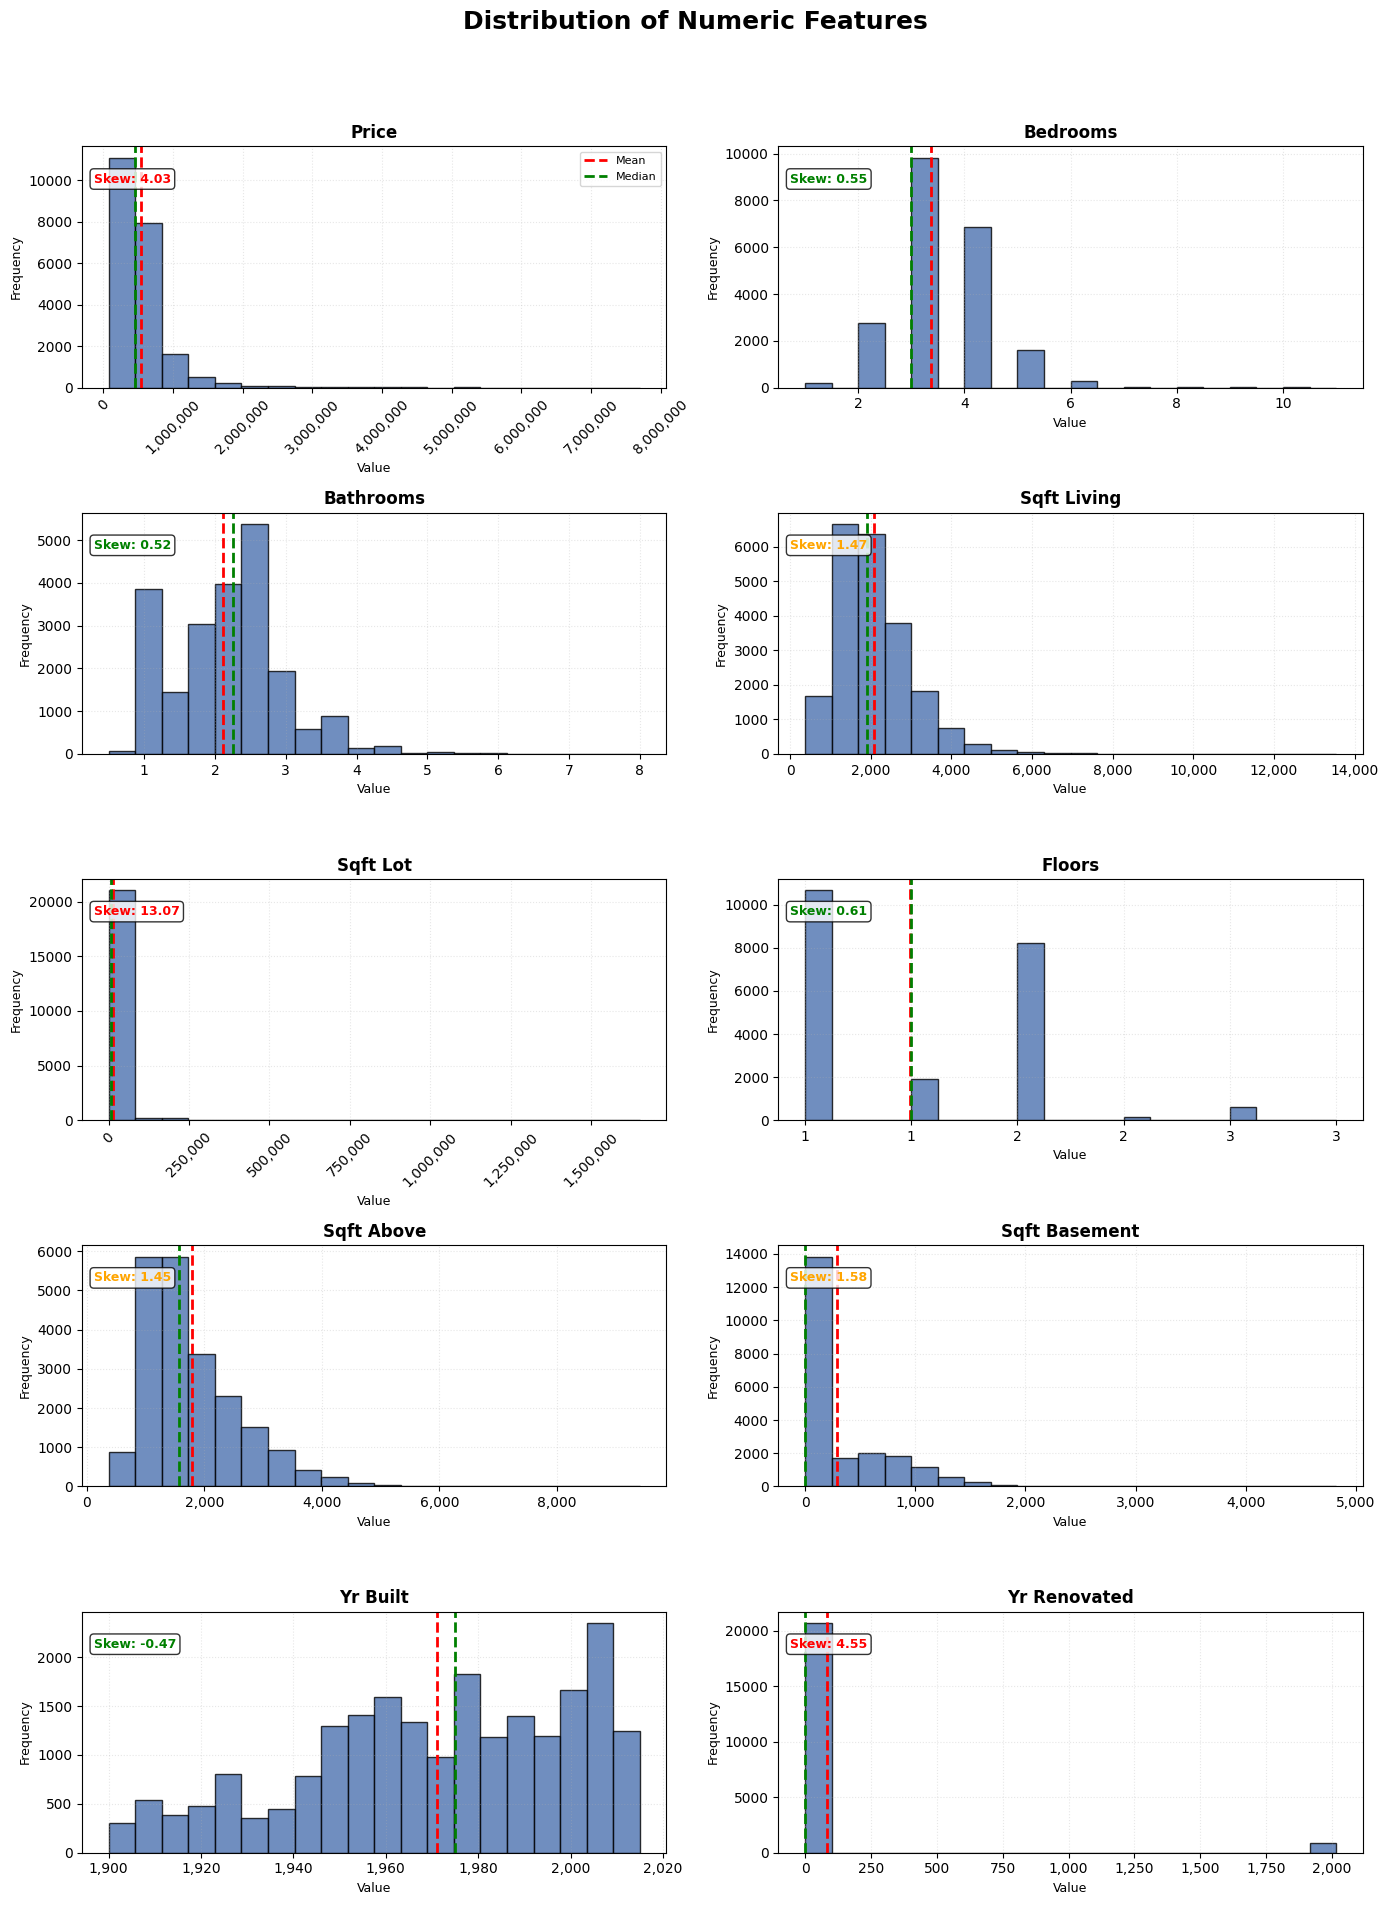

In [18]:
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
                    'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 
                    'yr_built', 'yr_renovated']

# Create figure with better spacing
fig = plt.figure(figsize=(14, 20))
fig.suptitle('Distribution of Numeric Features', fontsize=18, fontweight='bold', y=0.98)

# Create subplots with custom positioning with Matplotlib
for idx, feature in enumerate(numeric_features):
    # Create subplot (5 rows, 2 columns)
    ax = plt.subplot(5, 2, idx + 1)
    
    # Get the data and use best practices
    data = df_clean[feature].dropna()
    
    # Create histogram with better color
    n, bins, patches = ax.hist(data, bins=20, color='#4C72B0', edgecolor='black', alpha=0.8)
    
    # Add mean and median lines
    ax.axvline(data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(data.median(), color='green', linestyle='--', linewidth=2, label='Median')
    
    # Formatting
    ax.set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    ax.set_xlabel('Value', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.grid(True, alpha=0.3, linestyle=':')
    
    # Add legend for first plot only (to avoid clutter)
    if idx == 0:
        ax.legend(loc='upper right', fontsize=8)
    
    # Format large numbers with commas
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    # Rotate x-axis labels if needed
    if feature in ['price', 'sqft_lot']:  # Variables with very large values
        ax.tick_params(axis='x', rotation=45)
    
    # Add skewness information
    skewness = data.skew()
    skew_color = 'green' if abs(skewness) < 1 else 'orange' if abs(skewness) < 2 else 'red'
    ax.text(0.02, 0.85, f'Skew: {skewness:.2f}', transform=ax.transAxes,
            fontsize=9, color=skew_color, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show figure
plt.show()

**Categorical Feature Distributions**

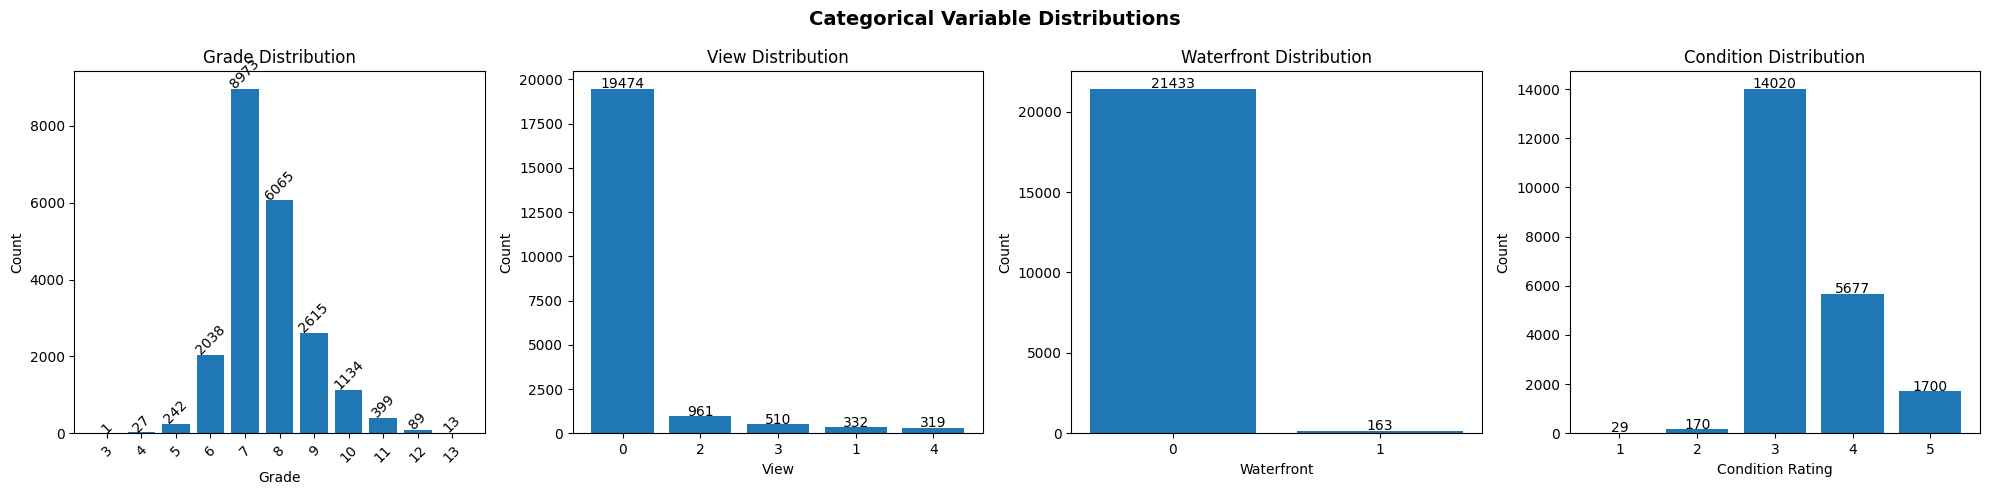

In [19]:
# Simple bar plots using matplotlib for the key categorical variables
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Grade distribution
grade_counts = df_clean['grade'].value_counts().sort_index()
axes[0].bar(grade_counts.index.astype(str), grade_counts.values)
axes[0].set_title("Grade Distribution")
axes[0].set_xlabel("Grade")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(grade_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', rotation=45)

# View distribution
view_counts = df_clean['view'].value_counts()
axes[1].bar(view_counts.index.astype(str), view_counts.values)
axes[1].set_title("View Distribution")
axes[1].set_xlabel("View")
axes[1].set_ylabel("Count")
for i, v in enumerate(view_counts.values):
    axes[1].text(i, v + 10, str(v), ha='center')

# Waterfront distribution
waterfront_counts = df_clean['waterfront'].value_counts()
axes[2].bar(waterfront_counts.index.astype(str), waterfront_counts.values)
axes[2].set_title("Waterfront Distribution")
axes[2].set_xlabel("Waterfront")
axes[2].set_ylabel("Count")
for i, v in enumerate(waterfront_counts.values):
    axes[2].text(i, v + 10, str(v), ha='center')

# Condition distribution
condition_counts = df_clean['condition'].value_counts().sort_index()
axes[3].bar(condition_counts.index.astype(str), condition_counts.values)
axes[3].set_title("Condition Distribution")
axes[3].set_xlabel("Condition Rating")
axes[3].set_ylabel("Count")
for i, v in enumerate(condition_counts.values):
    axes[3].text(i, v + 10, str(v), ha='center')

plt.suptitle("Categorical Variable Distributions", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Confirming the Skewnes with the Normality Check
Examines the distribution characteristics of Price using statistical normality test. 
- The Shapiro-Wilk test was applied to determine whether each variable follows a normal distribution.
- For N > 5000, Shapiro is very sensitive, but following the method learned pg.normality.

In [21]:
import pingouin as pg

# Method to check normality and recommend tests. Developed with GenAI support. 
def check_normality_and_recommend(data, column):
    """
    Performs Shapiro-Wilk test using Pingouin.
    Recommends Statistical Tests based on p-value.
    """
    print(f"\n--- Normality Analysis: {column.upper()} ---")
    
    # 1. Run Normality Test (Shapiro-Wilk is default in pingouin)
    stats = pg.normality(data[column])
    print(stats)
    
    is_normal = stats['normal'][0]
    p_value = stats['pval'][0]
    
    # 2. Check Skewness for Transformation advice
    skew = data[column].skew()
    print(f"Skewness: {skew:.4f}")
    
    # 3. Recommendations
    print(">> RECOMMENDATIONS:")
    
    if is_normal:
        print("   [STATISTICS] Distribution IS Normal.")
        print(f"P-Value: {p_value:.4f} is > 0.05 (Fail to Reject H0 - Normal Distribution)")
        print("   -> Compare 2 Groups: Independent T-Test")
        print("   -> Compare 3+ Groups: ANOVA")
    else:
        print("   [STATISTICS] Distribution is NOT Normal.")
        print(f"P-Value: {p_value:.4f} is <= 0.05 (Reject H0 - Not Normal Distribution)")
        print("   -> Compare 2 Groups: Mann-Whitney U Test")
        print("   -> Compare 3+ Groups: Kruskal-Wallis Test")
        
    if abs(skew) > 1:
        print("   [TRANSFORMATION] High Skew. Use Log Transformation for Prediction Models.")

# Test Key Variables
check_normality_and_recommend(df_clean, 'price')
check_normality_and_recommend(df_clean, 'sqft_living')


--- Normality Analysis: PRICE ---
              W           pval  normal
price  0.711859  9.079214e-104   False
Skewness: 4.0257
>> RECOMMENDATIONS:
   [STATISTICS] Distribution is NOT Normal.
P-Value: 0.0000 is <= 0.05 (Reject H0 - Not Normal Distribution)
   -> Compare 2 Groups: Mann-Whitney U Test
   -> Compare 3+ Groups: Kruskal-Wallis Test
   [TRANSFORMATION] High Skew. Use Log Transformation for Prediction Models.

--- Normality Analysis: SQFT_LIVING ---
                    W          pval  normal
sqft_living  0.914738  6.258521e-75   False
Skewness: 1.4731
>> RECOMMENDATIONS:
   [STATISTICS] Distribution is NOT Normal.
P-Value: 0.0000 is <= 0.05 (Reject H0 - Not Normal Distribution)
   -> Compare 2 Groups: Mann-Whitney U Test
   -> Compare 3+ Groups: Kruskal-Wallis Test
   [TRANSFORMATION] High Skew. Use Log Transformation for Prediction Models.


c:\MyStuff\CodeInstitute\Projects\ci-project-02\Home-Value-Analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21596.
  res = hypotest_fun_out(*samples, **kwds)
c:\MyStuff\CodeInstitute\Projects\ci-project-02\Home-Value-Analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21596.
  res = hypotest_fun_out(*samples, **kwds)


**Observations from the ditribution & the Normality Check | Data set size : Large (> 5000)**


**Ditribution Analysis**
* Most of the numerical variables are skewed. Specially the Spatial features. 
* Examined key categorical features are also not normally distributed except the grade. Most of them need to be encoded for a meaningful analysis. 


**Normality Check**
W Statistic (0 to 1 scale)
- Closer to 1 = More normal
- Closer to 0 = Less normal

Typical interpretation:
- W > 0.95 → Slight deviation, often acceptable
- W < 0.90 → Moderate deviation
- W < 0.85 → Substantial deviation from normality

Interpretation:
- Price (0.711859 < 0.85) : Non-normal

P-value (Significance test)
p < 0.05: Reject normality (data is NOT normal)
p-values is EXTREMELY small (practically 0)

We have statistical evidence that price and the other important numerrical variables are not normally distributed. So, have to consider neccessary actions accordingly for analysis

It helps to choose the right statistical test. 
- Parametric (T-Test/ANOVA) requires Normal Distribution.
- Non-Parametric (Mann-Whitney/Kruskal-Wallis) is for skewed data.

NOTE: Statistical significance (p ≤ 0.05) doesn't always mean practical significance. For large datasets, a statistically significant result might represent a trivial deviation from normality that won't affect the parametric tests.

---

## LOADING DATA
Load the data into CSV to cleaned_house_data.csv

In [22]:
print("=== LOADING DATA ===")

try:
  # Data directory paths
  data_path = os.path.join("..","data","processed")
  # Load cleaned dataset
  df_clean.to_csv(os.path.join(data_path, "cleaned_house_data.csv"), index=False)
except Exception as e:
  print(e)

print(f"Data saved to {os.path.join(data_path,'cleaned_house_data.csv')}")

=== LOADING DATA ===
Data saved to ..\data\processed\cleaned_house_data.csv


---

## Conclusions and Next Steps

1. Successfully extracted the raw data and performed a rigorous quality assessment. 
    * Data Integrity
    * Anomalies Handled
    * The cleaned dataset (cleaned_house_pricing.csv) now contains reliable records ready for transformation.
2. Performed Statistical Findings Using descriptive statistics, Shapiro-Wilk (via pg.normality) and Correlation Analysis.
3. Based on the non-normal distribution and skewness, defined the  strategy for the upcoming notebooks
4. In Notebook 02 (Data Transformation & Loading), features will be prepared for the analytical User Stories

NOTE: This code has been optimized with GenAI to improve maintainability and align with best practices. The documentation sections were also enhanced using AI.